# Random Forest Classifier
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble (perform multiple algorithms). Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
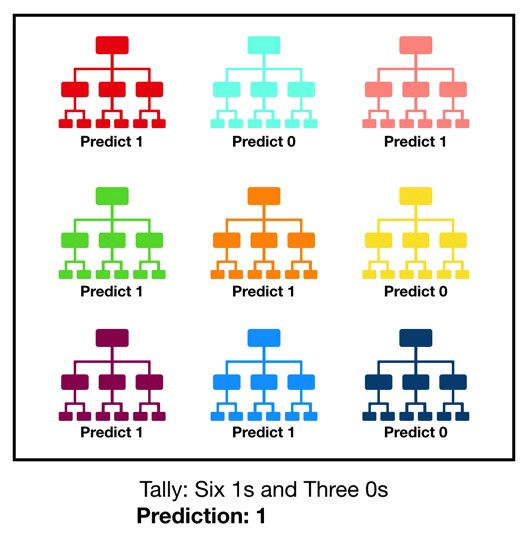

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

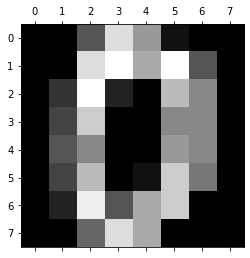

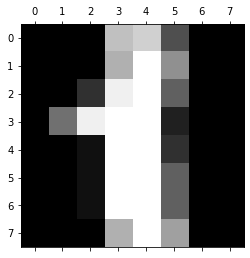

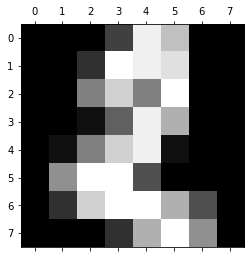

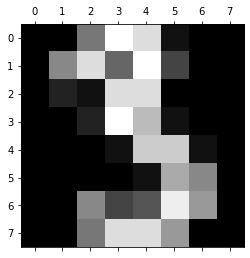

In [4]:
#visualise first 5 digits

plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
# digits.data provies 1-D array representation of the image ( 8*8 )
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Train Test Split

In [7]:
# Trainig the model
X = df.drop('target',axis='columns')
y = df.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Model Training

In [9]:
#tune parameters (eg. n_estimators =10,20,30,...)
from sklearn.ensemble import RandomForestClassifier # ensemble - perform multiple algorithms (Decision Trees)
model = RandomForestClassifier(n_estimators=20) 
# This is the number of trees you want to build before taking the maximum voting or averages of predictions.
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [10]:
y_predicted = model.predict(X_test)

In [11]:
# training accuracy
model.score(X_train,y_train)

1.0

In [12]:
# testing accuracy
model.score(X_test, y_test)

0.9527777777777777

### Find best value for 'n_estimators' parameter

In [13]:
n_estimators = {}
for n in range(10,101,10):
    model_n = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    n_estimators.update({n:accuracy})
estimators = pd.DataFrame({'n_estimators':n_estimators.keys(),
                           'Accuracy':n_estimators.values()})
estimators

,n_estimators,Accuracy
0,10,0.952778
1,20,0.961111
2,30,0.944444
3,40,0.947222
4,50,0.958333
5,60,0.958333
6,70,0.955556
7,80,0.958333
8,90,0.966667
9,100,0.966667


### Retrain model using best 'n_estimators'

In [14]:
model = RandomForestClassifier(n_estimators=30) 
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [15]:
y_predicted = model.predict(X_test)

In [16]:
# training accuracy
model.score(X_train,y_train)

1.0

In [17]:
# testing accuracy
model.score(X_test, y_test)

0.9666666666666667

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 35]], dtype=int64)

Text(69.0, 0.5, 'Actual')

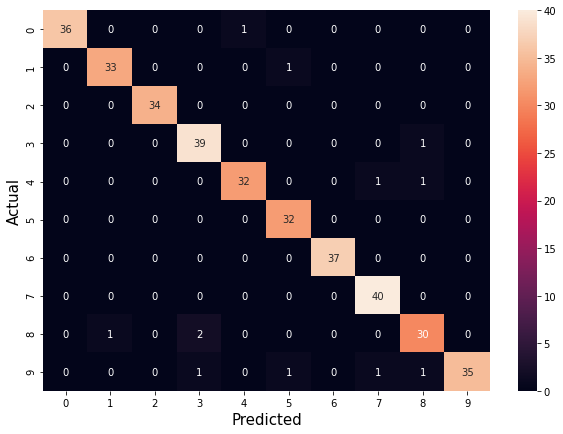

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)

# Note: 
**This notebook gives an gentle introduction to Random Forest Classifier with no mathematical explanation working behind.** <br>
**Complex Hyperparameter Turning will be performed in future projects.**